### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import dataframe_image as dfi


from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

pd.options.plotting.backend = "plotly"
plt.style.use("ggplot")
%matplotlib inline

### Análise

In [53]:
def count(df, column):
    df_novo = pd.DataFrame(df[column].value_counts())
    df_novo_percent = pd.DataFrame(df_novo * 100 / df_novo.sum())
    df_comp = df_novo_percent.join(df_novo, lsuffix='%')
    df_comp.loc['Total'] = df_comp.sum()
    

    return round(df_comp)

In [11]:
candidaturas = pd.read_csv('candidaturas2020_indig_completa.csv')

In [12]:
partidos = pd.read_csv('PART_POSI - PART_POSI.csv', sep='|')

In [14]:
candidaturas['sigla_partido'] = candidaturas['sigla_partido'].str.replace('PC do B', 'PC DO B')
candidaturas['sigla_partido'] = candidaturas['sigla_partido'].str.replace('PODE', 'PODEMOS')
candidaturas['sigla_partido'] = candidaturas['sigla_partido'].str.replace('SOLIDARIEDADE', 'SD')
candidaturas['sigla_partido'] = candidaturas['sigla_partido'].str.replace('PATRIOTA', 'PRP')

In [15]:
candidaturas = candidaturas.merge(partidos,
                                  left_on='sigla_partido',
                                  right_on='sigla_partido',
                                  how='left')

In [16]:
candidaturas['Posição'].isnull().value_counts()

False    2207
True        2
Name: Posição, dtype: int64

In [17]:
# como todos nulos é do partido Unidade Popular, vamos substituir pela posição do partido encontrada separadamente
candidaturas['Posição'].fillna('ESQUERDA', inplace=True)

In [18]:
candidaturas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2209 entries, 0 to 2208
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2209 non-null   int64  
 1   ano_x                 2209 non-null   int64  
 2   tipo_eleicao          2209 non-null   object 
 3   sigla_uf              2209 non-null   object 
 4   id_municipio          2209 non-null   int64  
 5   id_municipio_tse      2209 non-null   int64  
 6   id_candidato_bd       2209 non-null   float64
 7   sequencial_candidato  2209 non-null   int64  
 8   numero                2209 non-null   int64  
 9   nome                  2209 non-null   object 
 10  nome_urna             2209 non-null   object 
 11  numero_partido        2209 non-null   int64  
 12  sigla_partido         2209 non-null   object 
 13  cargo                 2209 non-null   object 
 14  situacao              2209 non-null   object 
 15  ocupacao             

In [18]:
candidaturas.isnull().sum()

Unnamed: 0                 0
ano_x                      0
tipo_eleicao               0
sigla_uf                   0
id_municipio               0
id_municipio_tse           0
id_candidato_bd            0
sequencial_candidato       0
numero                     0
nome                       0
nome_urna                  0
numero_partido             0
sigla_partido              0
cargo                      0
situacao                   0
ocupacao                   0
data_nascimento            0
idade                      0
genero                     0
instrucao                  0
estado_civil               0
nacionalidade              0
sigla_uf_nascimento        0
municipio_nascimento       0
raca                       0
resultado                291
fund_outro              1082
fund_part               2121
fund_esp                1387
Posição                    0
dtype: int64

In [18]:
candidaturas.columns.size

30

Só foi selecionado apenas os  candidatos deferidos e deferidos com recurso

In [19]:
candidaturas['situacao'].value_counts()

deferido                  2071
indeferido                  98
renuncia                    28
indeferido com recurso       7
deferido com recurso         3
falecido                     2
Name: situacao, dtype: int64

In [20]:
cand_deferidas = pd.DataFrame(candidaturas.query('situacao == "deferido" | situacao == "deferido com recurso" '))

In [21]:
cand_deferidas.dropna(subset=['resultado'], inplace=True)

In [22]:
cand_deferidas['resultado'].isnull().sum()

0

In [ ]:
partidos.to_csv('partidos_cand_indigenas.csv', index=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

DispatchError: Function <code object pandas_missing_bar at 0x000002064E64D210, file "C:\Users\Saman\anaconda3\envs\analise\lib\site-packages\pandas_profiling\model\pandas\missing_pandas.py", line 18>

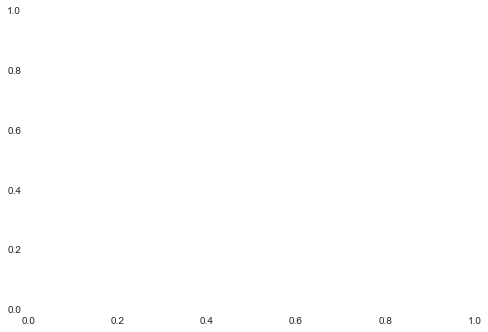

In [23]:
pandas_profiling.ProfileReport(cand_deferidas)

- Gênero

A base de análise ficou com candidatos aptos a ir as urnas.

In [25]:
cand_deferidas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 0 to 2208
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1917 non-null   int64  
 1   ano_x                 1917 non-null   int64  
 2   tipo_eleicao          1917 non-null   object 
 3   sigla_uf              1917 non-null   object 
 4   id_municipio          1917 non-null   int64  
 5   id_municipio_tse      1917 non-null   int64  
 6   id_candidato_bd       1917 non-null   float64
 7   sequencial_candidato  1917 non-null   int64  
 8   numero                1917 non-null   int64  
 9   nome                  1917 non-null   object 
 10  nome_urna             1917 non-null   object 
 11  numero_partido        1917 non-null   int64  
 12  sigla_partido         1917 non-null   object 
 13  cargo                 1917 non-null   object 
 14  situacao              1917 non-null   object 
 15  ocupacao             

In [26]:
genero = count(cand_deferidas, 'genero')
genero

genero%  genero
masculino     67.0  1277.0
feminino      33.0   640.0
Total        100.0  1917.0

In [32]:
dfi.export(genero ,  'genero.png')

In [30]:
cand_deferidas['genero'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))


- Idade

A média de idade é 42 anos 

In [45]:
describe_idade = pd.DataFrame(cand_deferidas['idade'].describe())
describe_idade.rename(columns={'idade':'describe'}, inplace=True)
describe_idade

describe
count  1917.000000
mean     41.991654
std      10.624691
min      18.000000
25%      35.000000
50%      41.000000
75%      49.000000
max      94.000000

In [46]:
dfi.export(describe_idade,  'describe_idade.png')

In [33]:
classes = [18,28,38,48,59,60]

In [34]:
labels = ['18-28' ,'29-38', '39-48', '49-59', 'maior que 60']

In [47]:
cand_deferidas['idade'].hist(template='plotly_white',
                                             labels=dict(
                                                         value='Idade',
                                                         variable=''))

In [36]:
#Criando coluna de faixa  etaria
classes = pd.cut(x=cand_deferidas.idade, bins=classes, labels=labels)

In [37]:
cand_deferidas['faixa_etaria'] = classes
cand_deferidas.head()

Unnamed: 0  ano_x       tipo_eleicao sigla_uf  id_municipio  \
0           0   2020  eleicao ordinaria       BA       2913606   
1           1   2020  eleicao ordinaria       MT       5103304   
2           2   2020  eleicao ordinaria       SP       3503356   
3           3   2020  eleicao ordinaria       SP       3553500   
4           4   2020  eleicao ordinaria       MT       5108402   

   id_municipio_tse  id_candidato_bd  sequencial_candidato  numero  \
0             35734           2711.0           50001109641   50777   
1             99015           4124.0          110001212680   55001   
2             62065           5865.0          250000640584   45888   
3             71714           6631.0          250001001737   70170   
4             91677           7147.0          110001259864   36200   

                      nome  ... nacionalidade  sigla_uf_nascimento  \
0       Ramon Souza Santos  ...    brasileira                   BA   
1  Paulo Henrique Mamainde  ...    brasileira                   MT   
2        Wagner Indubrasil  ...    brasileira                   SP   
3   Pedro Fernandes Soares  ...    brasileira                   SP   
4      Roque Teromnhi Eiwe  ...    brasileira                   MT   

  municipio_nascimento      raca   resultado fund_outro fund_part  fund_esp  \
0               Ilhéus  indigena  nao eleito        NaN       NaN    1210.0   
1             Comodoro  indigena    suplente        NaN       NaN       NaN   
2               Braúna  indigena    suplente      403.0       NaN     500.0   
3            São Paulo  indigena  nao eleito      180.0       NaN       NaN   
4     Novo São Joaquim  indigena  nao eleito        NaN       NaN       NaN   

    Posição faixa_etaria  
0  ESQUERDA        29-38  
1    CENTRO        29-38  
2    CENTRO        29-38  
3   DIREITA        49-59  
4   DIREITA        49-59  

[5 rows x 31 columns]

In [48]:
# Todos os nulos foi o que a label maior que 60 não conseguiu pegar
cand_deferidas['faixa_etaria'].isnull().sum()

95

In [49]:
cand_deferidas['faixa_etaria'].fillna('maior que 60', inplace=True)

In [54]:
faixa_etaria = count(cand_deferidas,'faixa_etaria')
faixa_etaria 

faixa_etaria%  faixa_etaria
39-48                  35.0         672.0
29-38                  28.0         544.0
49-59                  21.0         404.0
18-28                  10.0         193.0
maior que 60            5.0         104.0
Total                 100.0        1917.0

In [55]:
dfi.export(faixa_etaria,  'faixa_etaria.png')

 ##### Local de Nascimento

In [57]:
local_nasc = count(cand_deferidas, 'sigla_uf_nascimento')
local_nasc

sigla_uf_nascimento%  sigla_uf_nascimento
AM                     20.0                377.0
MS                     11.0                207.0
RR                      7.0                129.0
BA                      6.0                122.0
RS                      6.0                122.0
PE                      6.0                119.0
MT                      5.0                102.0
PA                      5.0                 96.0
PB                      3.0                 64.0
AC                      3.0                 63.0
MA                      3.0                 60.0
SP                      3.0                 51.0
SC                      3.0                 49.0
TO                      3.0                 48.0
MG                      2.0                 46.0
CE                      2.0                 43.0
PR                      2.0                 41.0
RO                      2.0                 39.0
AL                      2.0                 35.0
RJ                      1.0                 25.0
AP                      1.0                 21.0
GO                      1.0                 13.0
PI                      1.0                 12.0
ES                      1.0                 10.0
RN                      0.0                  9.0
SE                      0.0                  8.0
DF                      0.0                  5.0
ZZ                      0.0                  1.0
Total                 100.0               1917.0

In [59]:
dfi.export(local_nasc,  'local_nasc.png')

In [58]:
cand_deferidas['sigla_uf_nascimento'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

 - Local de candidatura

In [62]:
local_cand = count(cand_deferidas, 'sigla_uf')
local_cand 

sigla_uf%  sigla_uf
AM          19.0     371.0
MS          10.0     200.0
RR           7.0     133.0
RS           6.0     119.0
PE           6.0     118.0
BA           6.0     116.0
MT           6.0     115.0
PA           5.0      91.0
PB           3.0      67.0
SP           3.0      64.0
AC           3.0      61.0
MA           3.0      56.0
SC           3.0      54.0
MG           3.0      48.0
PR           2.0      47.0
TO           2.0      43.0
CE           2.0      42.0
AL           2.0      39.0
RO           2.0      35.0
RJ           1.0      23.0
AP           1.0      23.0
GO           1.0      20.0
RN           0.0       9.0
ES           0.0       9.0
SE           0.0       7.0
PI           0.0       7.0
Total      100.0    1917.0

In [63]:
dfi.export(local_cand,  'local_cand.png')

In [64]:
cand_deferidas['sigla_uf'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

 - Local de candidatura diferente de nascimento
 
 Há 7% candidatos nasceram em um local e se candidataram em outro. 

In [41]:
cand_deferidas.loc[ cand_deferidas['sigla_uf_nascimento'] != cand_deferidas['sigla_uf']]

Unnamed: 0  ano_x       tipo_eleicao sigla_uf  id_municipio  \
9              9   2020  eleicao ordinaria       SP       3536505   
10            10   2020  eleicao ordinaria       SC       4203709   
18            18   2020  eleicao ordinaria       SP       3518800   
22            22   2020  eleicao ordinaria       SP       3548500   
24            24   2020  eleicao ordinaria       TO       1718808   
...          ...    ...                ...      ...           ...   
1919        1919   2020  eleicao ordinaria       BA       2925501   
1928        1928   2020  eleicao ordinaria       BA       2925501   
1980        1980   2020  eleicao ordinaria       SC       4209151   
2152        2152   2020  eleicao ordinaria       MS       5006358   
2194        2194   2020  eleicao ordinaria       MT       5102603   

      id_municipio_tse  id_candidato_bd  sequencial_candidato  numero  \
9                68314          17538.0          250000991585   13420   
10               80713          18803.0          240000919341   10352   
18               64777          36866.0          250000684608   13040   
22               70718          41052.0          250001083331   12221   
24               92541          57394.0          270001122512   13300   
...                ...              ...                   ...     ...   
1919             38113         341802.0           50001210062   45222   
1928             38113        1002469.0           50001231495   65777   
1980             80101         467036.0          240000718260   15020   
2152             91847         769882.0          120001194639   13456   
2194             98655         987202.0          110001078366   45234   

                                nome  ...              nacionalidade  \
9     Luiz Felipe Rodrigues Da Silva  ...                 brasileira   
10                    Luciano Benite  ...                 brasileira   
18      Nayde De Oliveira Nascimento  ...                 brasileira   
22       Jaciara Ferreira Dos Santos  ...                 brasileira   
24            Anderson Dias Da Silva  ...  brasileira (naturalizada)   
...                              ...  ...                        ...   
1919        Creuza Vieira Dos Santos  ...                 brasileira   
1928      Lucas Da Anunciação Bonfim  ...                 brasileira   
1980              Natalina Vergueiro  ...                 brasileira   
2152       Clarice De Fatima Fermino  ...                 brasileira   
2194      Samira Marcos Tsibodowapré  ...                 brasileira   

      sigla_uf_nascimento municipio_nascimento      raca   resultado  \
9                      RJ       Rio De Janeiro  indigena  nao eleito   
10                     RS               Viamão  indigena  nao eleito   
18                     BA       Barra Do Choça  indigena    suplente   
22                     BA            Ibirataia  indigena  nao eleito   
24                     PI             Piripiri  indigena    suplente   
...                   ...                  ...       ...         ...   
1919                   GO              Goiânia  indigena  nao eleito   
1928                   ES                Serra  indigena    suplente   
1980                   RS               Nonoai  indigena    suplente   
2152                   PR               Guaíra  indigena  nao eleito   
2194                   DF             Brasília  indigena    suplente   

     fund_outro fund_part  fund_esp   Posição  faixa_etaria  
9           NaN       NaN   2516.38  ESQUERDA         29-38  
10       820.00       NaN   5000.00   DIREITA         18-28  
18      1951.00       NaN   9373.35  ESQUERDA         49-59  
22      1250.00       NaN       NaN  ESQUERDA         39-48  
24      1045.00       NaN    100.00  ESQUERDA  maior que 60  
...         ...       ...       ...       ...           ...  
1919     128.00       NaN       NaN    CENTRO         49-59  
1928        NaN       NaN       NaN  ESQUERDA         29-38  
1980     400

In [42]:
prop_loc_diferente = 159/2209
round(prop_loc_diferente*100)

7

 - Ocupação

In [67]:
ocup = count(cand_deferidas, 'ocupacao')
ocup.head(20)

ocupacao%  ocupacao
agricultor                                               22.0     415.0
outros                                                   22.0     415.0
professor de ensino fundamental                           7.0     135.0
servidor publico municipal                                6.0     108.0
vereador                                                  4.0      84.0
professor de ensino medio                                 4.0      70.0
estudante bolsista estagiario e assemelhados              3.0      66.0
dona de casa                                              3.0      61.0
agente de saude e sanitarista                             2.0      38.0
artesao                                                   2.0      34.0
empresario                                                2.0      33.0
comerciante                                               2.0      32.0
aposentado (exceto servidor publico)                      2.0      30.0
tecnico de enfermagem e assemelhados (exceto en...        2.0      29.0
trabalhador rural                                         2.0      29.0
servidor publico estadual                                 1.0      24.0
pedagogo                                                  1.0      15.0
agente administrativo                                     1.0      14.0
vendedor pracista representante caixeiro-viajan...        1.0      14.0
administrador                                             1.0      13.0

In [68]:
dfi.export(ocup,  'ocup.png', max_rows=100)

In [69]:
cand_deferidas['ocupacao'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

 - Instrução

In [70]:
instrucao = count(cand_deferidas, 'instrucao')
instrucao

instrucao%  instrucao
ensino medio completo                39.0      753.0
ensino superior completo             21.0      406.0
ensino fundamental incompleto        13.0      246.0
ensino fundamental completo          11.0      218.0
ensino medio incompleto               6.0      112.0
le e escreve                          5.0      104.0
ensino superior incompleto            4.0       78.0
Total                               100.0     1917.0

In [73]:
dfi.export(instrucao,  'instrucao.png')

In [72]:
cand_deferidas['instrucao'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

- Estado Civil

In [75]:
est_civil = count(cand_deferidas,  'estado_civil')
est_civil

estado_civil%  estado_civil
solteiro(a)             59.0        1128.0
casado(a)               37.0         700.0
divorciado(a)            3.0          64.0
viuvo(a)                 1.0          25.0
Total                  100.0        1917.0

In [76]:
dfi.export(est_civil,  'est_civil.png')

In [77]:
cand_deferidas['estado_civil'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

- Cargo

In [78]:
cargo = count(cand_deferidas, 'cargo')
cargo 

cargo%   cargo
vereador    98.0  1881.0
prefeito     2.0    36.0
Total      100.0  1917.0

In [79]:
dfi.export(cargo,  'cargo.png')

In [80]:
cand_deferidas['cargo'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

 - Partido
 


In [83]:
partidos = count(cand_deferidas, 'sigla_partido')
partidos

sigla_partido%  sigla_partido
PT                      12.0          233.0
PP                       7.0          136.0
MDB                      7.0          127.0
PSD                      6.0          122.0
PDT                      6.0          112.0
PSDB                     5.0          105.0
DEM                      5.0          101.0
PC DO B                  4.0           86.0
REPUBLICANOS             4.0           80.0
PL                       4.0           77.0
REDE                     4.0           72.0
PTB                      4.0           68.0
PSB                      3.0           66.0
CIDADANIA                3.0           63.0
PSC                      3.0           61.0
PODEMOS                  3.0           50.0
PSL                      2.0           46.0
AVANTE                   2.0           46.0
PV                       2.0           45.0
PROS                     2.0           42.0
SD                       2.0           41.0
PSOL                     2.0           41.0
PRP                      2.0           31.0
DC                       1.0           20.0
PRTB                     1.0           16.0
PTC                      1.0           14.0
PSTU                     0.0            5.0
PMN                      0.0            5.0
PMB                      0.0            3.0
UP                       0.0            2.0
NOVO                     0.0            1.0
Total                  100.0         1917.0

In [85]:
dfi.export(partidos,  'partidos.png')

In [86]:
cand_deferidas['sigla_partido'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

In [87]:
candidaturpartidos = count(cand_deferidas, 'Posição')
candidaturpartidos

Posição%  Posição
DIREITA       44.0    838.0
ESQUERDA      28.0    545.0
CENTRO        28.0    534.0
Total        100.0   1917.0

In [88]:
dfi.export(candidaturpartidos,  'candidaturpartidos.png')

Resultado

8% dos que se candidatam a vereador são eleitos e apenas 0,4% que se candidata a prefeito são eleitos.

E 0.5% dos candidatos eleitos nasceu em um local mas se candidatou em outro

In [92]:
for (row, col) in cand_deferidas.iterrows():
    if col.resultado == 'eleito por media':
        cand_deferidas['resultado'].replace(to_replace=col.resultado,
                                        value='eleito',
                                        inplace=True)
    if col.resultado == 'eleito por qp':
        cand_deferidas['resultado'].replace(to_replace=col.resultado,
                                        value='eleito',
                                        inplace=True)

In [93]:
resultado = count(cand_deferidas, 'resultado')
resultado

resultado%  resultado
suplente          60.0     1141.0
nao eleito        31.0      592.0
eleito            10.0      184.0
Total            100.0     1917.0

In [94]:
dfi.export(resultado,  'resultado.png')

In [95]:
cand_deferidas['resultado'].value_counts().plot(kind='barh',
                                             template='plotly_white',
                                             labels=dict(index='',
                                                         value='Quantidade',
                                                         variable=''))

In [53]:
eleitos = pd.DataFrame(cand_deferidas.query('resultado == "eleito por qp" | resultado == "eleito por media" | resultado == "eleito"'))

In [54]:
eleitos

Unnamed: 0  ano_x       tipo_eleicao sigla_uf  id_municipio  \
29            29   2020  eleicao ordinaria       AC       1200302   
40            40   2020  eleicao ordinaria       MG       3151206   
44            44   2020  eleicao ordinaria       PA       1503044   
54            54   2020  eleicao ordinaria       AM       1300904   
61            61   2020  eleicao ordinaria       PE       2609303   
...          ...    ...                ...      ...           ...   
2095        2095   2020  eleicao ordinaria       MS       5004809   
2136        2136   2020  eleicao ordinaria       MS       5005608   
2158        2158   2020  eleicao ordinaria       MS       5006358   
2185        2185   2020  eleicao ordinaria       MT       5102603   
2192        2192   2020  eleicao ordinaria       MT       5102603   

      id_municipio_tse  id_candidato_bd  sequencial_candidato  numero  \
29                1139          66166.0           10001268350   25678   
40               50237          80240.0          130000798521   20610   
44                4561          88209.0          140001095592   13456   
54                2194         109785.0           40001130359   22123   
61               24856         119652.0          170000995527   13777   
...                ...              ...                   ...     ...   
2095             55034         187699.0          120000968445   55444   
2136             91111         850676.0          120000986955   14999   
2158             91847        1132318.0          120001039252   15666   
2185             98655         631328.0          110000978305   90111   
2192             98655         922690.0          110001078373   45135   

                                    nome  ...              nacionalidade  \
29       Raimundo Décio Barbosa Da Silva  ...                 brasileira   
40              Anselmo Luiz Maia Caires  ...                 brasileira   
44                Renato Pereira Alencar  ...                 brasileira   
54                 Marlete Nunes Brandão  ...                 brasileira   
61                Aluisio Nunes Da Silva  ...                 brasileira   
...                                  ...  ...                        ...   
2095                   Dorival Velasquez  ...                 brasileira   
2136              Sibeli Faustino Inacio  ...                 brasileira   
2158                     Cleber Valiente  ...                 brasileira   
2185   Azevedo Onésimo Waamate Tserebuto  ...                 brasileira   
2192  Gininho Tseredzapriwê Tsibo  Oopré  ...  brasileira (naturalizada)   

      sigla_uf_nascimento municipio_nascimento      raca resultado fund_outro  \
29                     AC                Feijó  indigena    eleito     123.03   
40                     MG             Pirapora  indigena    eleito    1975.00   
44                     TO           Pau D Arco  indigena    eleito     730.00   
54                     AM             Canutama  indigena    eleito    9095.90   
61                     PE            Mirandiba  indigena    eleito        NaN   
...                   ...                  ...       ...       ...        ...   
2095                   MS               Japorã  indigena    eleito        NaN   
2136                   MS              Miranda  indigena    eleito        NaN   
2158                   MS             Paranhos  indigena    eleito    2246.30   
2185                   MT       Nova Xavantina  indigena    eleito    4115.00   
2192                   MT         Campinápolis  indigena    eleito    3272.28   

     fund_part  fund_esp   Posição faixa_etaria  
29      2000.0       NaN   DIREITA        49-59  
40         NaN       NaN   DIREITA        49-59  
44         NaN    594.27  ESQUERDA        49-59  
54         NaN       NaN   DIREITA        49-59  
61         NaN   1000.00  ESQUERDA        49-59  
...        ...       ...       ...          ...  
2095       NaN       NaN    CENTRO        29-38  
2136       NaN

In [55]:
eleitos['cargo'].value_counts()

vereador    176
prefeito      8
Name: cargo, dtype: int64

In [56]:
prop_vereador_eleito = 176/2209
round(prop_vereador_eleito*100,1)

8.0

In [57]:
prop_prefeito_eleito = 8/2209
round(prop_prefeito_eleito*100, 1)


0.4

In [58]:
eleitos.loc[ eleitos['sigla_uf_nascimento'] != eleitos['sigla_uf']]

Unnamed: 0  ano_x       tipo_eleicao sigla_uf  id_municipio  \
44            44   2020  eleicao ordinaria       PA       1503044   
124          124   2020  eleicao ordinaria       RS       4301305   
128          128   2020  eleicao ordinaria       PR       4105706   
709          709   2020  eleicao ordinaria       MT       5107792   
774          774   2020  eleicao ordinaria       SP       3518800   
902          902   2020  eleicao ordinaria       MG       3154309   
1029        1029   2020  eleicao ordinaria       PB       2504009   
1130        1130   2020  eleicao ordinaria       MT       5105309   
1424        1424   2020  eleicao ordinaria       AM       1303809   
1685        1685   2020  eleicao ordinaria       PA       1503754   
1796        1796   2020  eleicao ordinaria       PB       2509057   

      id_municipio_tse  id_candidato_bd  sequencial_candidato  numero  \
44                4561          88209.0          140001095592   13456   
124              85251         228085.0          210000731081      11   
128              75094         244126.0          160001196641   15005   
709              89843         994012.0          110000931511   43333   
774              64777        1067222.0          250000684605   13013   
902              50857        1255023.0          130000976664   55123   
1029             19810        1555544.0          150000912665   25025   
1130             91057        1799932.0          110000994833   22345   
1424              2836         480008.0           40001084181   19111   
1685              4200         509335.0          140000740050   10200   
1796             19968        1091938.0          150001104401   23000   

                                       nome  ...              nacionalidade  \
44                   Renato Pereira Alencar  ...                 brasileira   
124              Ivan Antonio Guevara Lopez  ...  brasileira (naturalizada)   
128                            Miguel Alves  ...                 brasileira   
709              Leonardo Sousa Wa Rovedene  ...                 brasileira   
774              Rômulo Ornelas De Oliveira  ...                 brasileira   
902                 Geovani Bezerra Adilson  ...                 brasileira   
1029                 Waldeny Mendes Santana  ...                 brasileira   
1130             João Jose Silva Dos Santos  ...                 brasileira   
1424  Suely Diana Ambrozio De Oliveira Lobo  ...                 brasileira   
1685      Gerson Barbosa Manhuary Munduruku  ...                 brasileira   
1796                   Giovane Candido Lima  ...                 brasileira   

      sigla_uf_nascimento   municipio_nascimento      raca resultado  \
44                     TO             Pau D Arco  indigena    eleito   
124                    ZZ              Nicarágua  indigena    eleito   
128                    RS                 Nonoai  indigena    eleito   
709                    GO                  Jataí  indigena    eleito   
774                    MG             Comercinho  indigena    eleito   
902                    SP                   Tupã  indigena    eleito   
1029                   PI                  Picos  indigena    eleito   
1130                   TO  Miracema Do Tocantins  indigena    eleito   
1424                   GO                Goiânia  indigena    eleito   
1685                   AM                  Borba  indigena    eleito   
1796                   RJ             Petrópolis  indigena    eleito   

     fund_outro fund_part  fund_esp   Posição  faixa_etaria  
44       730.00       NaN    594.27  ESQUERDA         49-59  
124         NaN       NaN  61700.00   DIREITA  maior que 60  
128     1426.90       NaN       NaN    CENTRO         49-59  
709     3915.57       NaN       NaN    CENTRO         29-38  
774    27700.00       NaN       NaN  ESQUERDA  maior que 60  
902     5203.10       NaN    756.39    CENTRO         29-38  
1029    7744.00   3398.21       NaN   DIREITA       

In [59]:
prop_eleito_loc_dif = 11/2209
round(prop_eleito_loc_dif*100,1)

0.5

Receitas 

Todos os dados nulos nos fundos, foram substituídos por zero 
- Fundo Outro 984 nulos
- Fundo partidário 1990 nulos
- Fundo especial 1273 nulos

E a classifcação dos candidatos será feita pelos quartis da soma dos fundos, conforme abaixo;




Fundo outro

In [96]:
cand_deferidas['fund_outro'].describe()

count      1041.000000
mean       2232.282171
std        6100.930091
min           1.200000
25%         400.000000
50%         907.850000
75%        2180.000000
max      114629.100000
Name: fund_outro, dtype: float64

In [98]:
cand_deferidas['fund_outro'].fillna(0, inplace=True)

In [107]:
fundo_outro = pd.DataFrame(cand_deferidas['fund_outro'].describe())
fundo_outro = round(fundo_outro)
fundo_outro

fund_outro
count      1917.0
mean       1212.0
std        4630.0
min           0.0
25%           0.0
50%         153.0
75%        1020.0
max      114629.0

In [108]:
dfi.export(fundo_outro,  'fundo_outro.png')

<AxesSubplot:xlabel='fund_outro'>

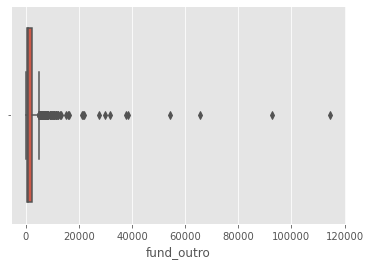

In [97]:
sns.boxplot(x=cand_deferidas['fund_outro'])

Fundo Partidário

In [110]:
cand_deferidas['fund_part'].describe()

count     1917.000000
mean       126.420981
std       2094.180950
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      80000.000000
Name: fund_part, dtype: float64

In [109]:
cand_deferidas['fund_part'].fillna(0, inplace=True)

In [111]:
fund_part = pd.DataFrame(cand_deferidas['fund_part'].describe())
fund_part = round(fund_part)
fund_part

fund_part
count     1917.0
mean       126.0
std       2094.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max      80000.0

In [112]:
dfi.export(fund_part,  'fund_part.png')

<AxesSubplot:xlabel='fund_part'>

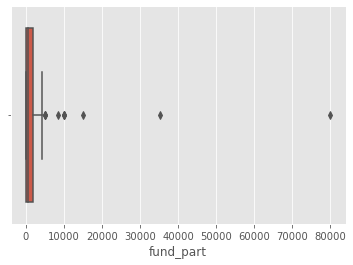

In [105]:
sns.boxplot(x=cand_deferidas['fund_part'])

Fundo especial

In [114]:
cand_deferidas['fund_esp'].describe()

count       771.00000
mean       5350.44083
std       16249.47250
min          21.25000
25%         510.60000
50%        1152.48000
75%        4000.00000
max      284614.09000
Name: fund_esp, dtype: float64

<AxesSubplot:xlabel='fund_esp'>

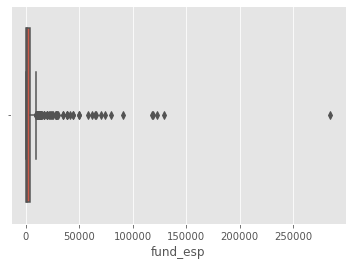

In [115]:
sns.boxplot(x=cand_deferidas['fund_esp'])

In [116]:
cand_deferidas['fund_esp'].fillna(0, inplace=True)

In [117]:
fund_esp = pd.DataFrame(cand_deferidas['fund_esp'].describe())
fund_esp = round(fund_esp)
fund_esp

fund_esp
count    1917.0
mean     2152.0
std     10630.0
min         0.0
25%         0.0
50%         0.0
75%       827.0
max    284614.0

In [118]:
dfi.export(fund_esp,  'fund_esp.png')

Soma dos fundos

In [120]:
cand_deferidas['soma_fundo'] = cand_deferidas['fund_esp'] + cand_deferidas['fund_part'] + cand_deferidas['fund_outro']

In [121]:
soma = pd.DataFrame(cand_deferidas['soma_fundo'].describe())
soma = round(soma)
soma

soma_fundo
count      1917.0
mean       3491.0
std       14895.0
min           0.0
25%         124.0
50%         830.0
75%        2512.0
max      479243.0

In [122]:
dfi.export(soma,  'soma.png')

In [126]:
cand_deferidas['grana'] = cand_deferidas['soma_fundo']

In [127]:
minimo = cand_deferidas['soma_fundo'].min()

In [128]:
q1 = cand_deferidas['soma_fundo'].quantile(0.25)
q2 = cand_deferidas['soma_fundo'].quantile(0.50)
q3 = cand_deferidas['soma_fundo'].quantile(0.75)

In [129]:
for (row, col) in cand_deferidas.iterrows():
    if col.grana == minimo:
        cand_deferidas['grana'].replace(to_replace=col.grana,
                                        value='sem grana',
                                        inplace=True)
    if col.grana > minimo and col.grana <= q1:
        cand_deferidas['grana'].replace(to_replace=col.grana,
                                        value='muito pouco',
                                        inplace=True)
    if col.grana > q1 and col.grana <= q2:
        cand_deferidas['grana'].replace(to_replace=col.grana,
                                        value='pouco',
                                        inplace=True)
    if col.grana > q2 and col.grana <= q3:
        cand_deferidas['grana'].replace(to_replace=col.grana,
                                        value='bom',
                                        inplace=True)
    else:
        cand_deferidas['grana'].replace(to_replace=col.grana,
                                        value='muito bom',
                                        inplace=True)

Não excluir os zerados.

In [130]:
grana = count(cand_deferidas, 'grana')
grana

grana%   grana
bom            25.0   479.0
muito bom      25.0   479.0
pouco          25.0   475.0
sem grana      22.0   418.0
muito pouco     3.0    66.0
Total         100.0  1917.0

In [131]:
dfi.export(grana,  'grana.png')

In [132]:
grana.drop('Total', axis=0, inplace=True)

In [133]:
grana['grana%'].plot(kind='barh',
                     template='plotly_white',
                     labels=dict(index='', value='Percentual', variable=''))

In [134]:
fig = px.violin(grana , y='grana%', box=True, # draw box plot inside the violin
                points='all',template='plotly_white' # can be 'outliers', or False
               )
fig.show()

Juliana Cardoso do PT, tem o maior valor de fundos e foi eleita

In [135]:
maior_fundo = cand_deferidas.loc[cand_deferidas['soma_fundo'] >= 479243].transpose()

In [136]:
dfi.export(maior_fundo,  'maior_fundo.png')

Mabulewe Karajá do PDT, teve o menor valor de fundo e não foi eleito

In [82]:
cand_deferidas.loc[cand_deferidas['soma_fundo'] <= 10.5].transpose()

1     \
Unnamed: 0                                      1   
ano_x                                        2020   
tipo_eleicao                    eleicao ordinaria   
sigla_uf                                       MT   
id_municipio                              5103304   
id_municipio_tse                            99015   
id_candidato_bd                            4124.0   
sequencial_candidato                 110001212680   
numero                                      55001   
nome                      Paulo Henrique Mamainde   
nome_urna                          Paulo Henrique   
numero_partido                                 55   
sigla_partido                                 PSD   
cargo                                    vereador   
situacao                                 deferido   
ocupacao                                   outros   
data_nascimento                        1991-08-28   
idade                                          29   
genero                                  masculino   
instrucao             ensino fundamental completo   
estado_civil                          solteiro(a)   
nacionalidade                          brasileira   
sigla_uf_nascimento                            MT   
municipio_nascimento                     Comodoro   
raca                                     indigena   
resultado                                suplente   
fund_outro                                    0.0   
fund_part                                     0.0   
fund_esp                                      0.0   
Posição                                    CENTRO   
faixa_etaria                                29-38   
soma_fundo                                    0.0   
grana                                   sem grana   

                                                      4     \
Unnamed: 0                                               4   
ano_x                                                 2020   
tipo_eleicao                             eleicao ordinaria   
sigla_uf                                                MT   
id_municipio                                       5108402   
id_municipio_tse                                     91677   
id_candidato_bd                                     7147.0   
sequencial_candidato                          110001259864   
numero                                               36200   
nome                                   Roque Teromnhi Eiwe   
nome_urna                                    Roque Xavante   
numero_partido                                          36   
sigla_partido                                          PTC   
cargo                                             vereador   
situacao                                          deferido   
ocupacao              aposentado (exceto servidor publico)   
data_nascimento                                 1963-12-31   
idade                                                   57   
genero                                           masculino   
instrucao                         ensino superior completo   
estado_civil                                     casado(a)   
nacionalidade                                   brasileira   
sigla_uf_nascimento                                     MT   
municipio_nascimento                      Novo São Joaquim   
raca                                              indigena   
resultado                                       nao eleito   
fund_outro                                             0.0   
fund_part                                              0.0   
fund_esp                                               0.0   
Posição                                            DIREITA   
faixa_etaria                                         49-59   
soma_fundo                                             0.0   
grana                                            sem grana   

                                                                   6     \
Unnamed: 0                                                

In [83]:
cand_deferidas.columns

Index(['Unnamed: 0', 'ano_x', 'tipo_eleicao', 'sigla_uf', 'id_municipio',
       'id_municipio_tse', 'id_candidato_bd', 'sequencial_candidato', 'numero',
       'nome', 'nome_urna', 'numero_partido', 'sigla_partido', 'cargo',
       'situacao', 'ocupacao', 'data_nascimento', 'idade', 'genero',
       'instrucao', 'estado_civil', 'nacionalidade', 'sigla_uf_nascimento',
       'municipio_nascimento', 'raca', 'resultado', 'fund_outro', 'fund_part',
       'fund_esp', 'Posição', 'faixa_etaria', 'soma_fundo', 'grana'],
      dtype='object')

In [84]:
cand_deferidas.to_csv('cand_indigenas_def_tratada.csv')

## Análise bivariada 

Normalizei soma_fundo pela média e analise gênero, cargo, resultado, posição do partido

In [3]:
cand_deferidas = pd.read_csv('cand_indigenas_def_tratada.csv')

In [4]:
cand_deferidas.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ano_x', 'tipo_eleicao', 'sigla_uf',
       'id_municipio', 'id_municipio_tse', 'id_candidato_bd',
       'sequencial_candidato', 'numero', 'nome', 'nome_urna', 'numero_partido',
       'sigla_partido', 'cargo', 'situacao', 'ocupacao', 'data_nascimento',
       'idade', 'genero', 'instrucao', 'estado_civil', 'nacionalidade',
       'sigla_uf_nascimento', 'municipio_nascimento', 'raca', 'resultado',
       'fund_outro', 'fund_part', 'fund_esp', 'Posição', 'faixa_etaria',
       'soma_fundo', 'grana'],
      dtype='object')

In [123]:
fig = px.histogram(cand_deferidas, x='soma_fundo',color ='genero') 
fig.show()

In [124]:
fig = px.violin(cand_deferidas , y='soma_fundo', box=True, # draw box plot inside the violin
                points='all',template='plotly_white' # can be 'outliers', or False
               )
fig.show()

 - Gênero 

In [7]:
def agrupando(colun):
    return round(cand_deferidas.groupby(colun)['soma_fundo'].describe(),2)

In [8]:
def graph_violin(col):
    fig = px.violin(cand_deferidas, y='soma_fundo', x=col, color='genero', box=True, points="all",
          hover_data=cand_deferidas.columns)
    return fig.show()

In [9]:
agrupando('genero')

count     mean       std  min     25%    50%      75%        max
genero                                                                      
feminino    640.0  4065.98  20962.49  0.0  109.25  945.5  3000.00  479243.19
masculino  1277.0  3202.13  10621.31  0.0  124.00  789.0  2388.14  145450.00

In [10]:
graph_violin('genero')

 - Cargo

In [ ]:
agrupando('cargo')

In [ ]:
graph_violin('cargo')

 - Resultado 

In [100]:
agrupando('resultado')

count      mean       std  min    25%      50%      75%  \
resultado                                                              
eleito       184.0  10449.02  40558.07  0.0  949.9  2055.14  5534.14   
nao eleito   592.0   3800.38   9587.28  0.0    0.0   656.66  3015.14   
suplente    1141.0   2207.62   7185.89  0.0  141.8   754.58  2008.96   

                  max  
resultado              
eleito      479243.19  
nao eleito  106033.90  
suplente    149908.58

In [101]:
graph_violin('resultado')

 - Posição 

In [102]:
agrupando('Posição')

count     mean       std  min     25%     50%      75%        max
Posição                                                                    
CENTRO    534.0  4084.87  12115.05  0.0  260.25   940.5  2682.46  134486.50
DIREITA   838.0  2419.30   8528.82  0.0    0.00   542.5  2008.96  145450.00
ESQUERDA  545.0  4555.32  22855.72  0.0  277.00  1230.0  3256.66  479243.19

In [ ]:
graph_violin('Posição')

 - Instrução

In [103]:
agrupando( 'instrucao')

count     mean       std  min     25%      50%  \
instrucao                                                                       
ensino fundamental completo    218.0  2217.78  10074.35  0.0  128.00   629.00   
ensino fundamental incompleto  246.0  2377.74   9882.14  0.0  104.25   692.25   
ensino medio completo          753.0  2462.01   5567.32  0.0   23.80   800.00   
ensino medio incompleto        112.0  1598.32   2607.27  0.0   22.02   815.00   
ensino superior completo       406.0  7716.75  29067.30  0.0  247.68  1350.00   
ensino superior incompleto      78.0  4218.43   6032.58  0.0  537.25  2015.46   
le e escreve                   104.0  1230.74   1915.66  0.0    0.00   505.60   

                                   75%        max  
instrucao                                          
ensino fundamental completo    1908.15  145450.00  
ensino fundamental incompleto  1821.39  134486.50  
ensino medio completo          2136.21   72188.00  
ensino medio incompleto        1848.34   19150.00  
ensino superior completo       4820.92  479243.19  
ensino superior incompleto     4930.00   31645.78  
le e escreve                   1540.00    9693.30

In [ ]:
graph_violin('instrucao')

 - Instrução

In [104]:
agrupando( 'faixa_etaria')

count     mean       std  min     25%     50%      75%  \
faixa_etaria                                                           
18-28         193.0  2967.98   7630.14  0.0  123.60  839.98  2900.00   
29-38         544.0  2865.76   8743.77  0.0  102.32  810.00  2590.76   
39-48         672.0  4023.54  21201.17  0.0  123.60  883.40  2358.78   
49-59         404.0  3818.26  12687.45  0.0  128.00  737.50  2779.75   
maior que 60  104.0  3011.07   7217.29  0.0  138.75  800.00  2745.16   

                    max  
faixa_etaria             
18-28          86440.32  
29-38         149908.58  
39-48         479243.19  
49-59         134486.50  
maior que 60   61700.00

In [ ]:
graph_violin('faixa_etaria')

### Clusterização 



In [61]:
df = cand_deferidas.copy()


In [18]:
X = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'ano_x', 'tipo_eleicao', 'sigla_uf',
       'id_municipio', 'id_municipio_tse', 'id_candidato_bd',
       'sequencial_candidato', 'numero', 'nome', 'nome_urna', 'numero_partido',
       'sigla_partido', 'cargo', 'situacao', 'ocupacao', 'data_nascimento',
       'idade', 'genero', 'instrucao', 'estado_civil', 'nacionalidade',
       'sigla_uf_nascimento', 'municipio_nascimento', 'raca', 'resultado',
        'Posição', 'faixa_etaria',
       'soma_fundo', 'grana'
],
           axis=1)


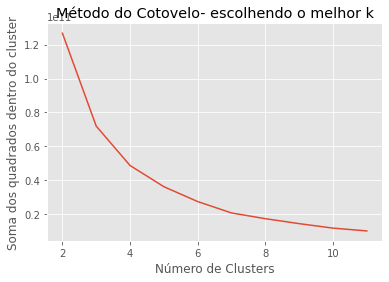

In [41]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 12), wcss)
plt.title("Método do Cotovelo- escolhendo o melhor k")
plt.xlabel("Número de Clusters")
plt.ylabel("Soma dos quadrados dentro do cluster")
plt.show()



In [42]:
# pre pocessamento, média =0 e desvio padrão=1
X_std= StandardScaler().fit_transform(X)

In [43]:
# Treinando o modelo, k = 5
km = KMeans(5, random_state=42)
km.fit(X_std)
KMeans(algorithm='auto', copy_x=True, init='k-means', max_iter=300, 
        n_clusters=5, n_init=10,
        random_state=42, tol= 0.0001, verbose=0)

KMeans(init='k-means', n_clusters=5, random_state=42)

In [45]:
# Atribuindo novas amostras ao cluster
X_km = km.predict(X)
X_km

C:\Users\Saman\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but KMeans was fitted without feature names



array([1, 0, 1, ..., 0, 0, 1])

In [48]:
# Colocando os dados na planilha geral
cand_deferidas['clusters'] = X_km

In [51]:
cand_deferidas['clusters'].unique()

array([1, 0, 3, 2, 4])

In [52]:
cand_deferidas['clusters'].value_counts()

1    1470
0     418
3      18
2       9
4       2
Name: clusters, dtype: int64

In [62]:
cand_deferidas[cand_deferidas['clusters'] == 1]


Unnamed: 0.1  Unnamed: 0  ano_x       tipo_eleicao sigla_uf  \
0                0           0   2020  eleicao ordinaria       BA   
2                2           2   2020  eleicao ordinaria       SP   
3                3           3   2020  eleicao ordinaria       SP   
5                5           5   2020  eleicao ordinaria       PA   
7                7           7   2020  eleicao ordinaria       AM   
...            ...         ...    ...                ...      ...   
1909          2201        2201   2020  eleicao ordinaria       MT   
1910          2202        2202   2020  eleicao ordinaria       MT   
1911          2203        2203   2020  eleicao ordinaria       MT   
1913          2205        2205   2020  eleicao ordinaria       MT   
1916          2208        2208   2020  eleicao ordinaria       MT   

      id_municipio  id_municipio_tse  id_candidato_bd  sequencial_candidato  \
0          2913606             35734           2711.0           50001109641   
2          3503356             62065           5865.0          250000640584   
3          3553500             71714           6631.0          250001001737   
5          1504422              4642           7498.0          140001246837   
7          1301605              2330           8644.0           40001045227   
...            ...               ...              ...                   ...   
1909       5102603             98655        1103112.0          110001075724   
1910       5102603             98655        1112944.0          110001075728   
1911       5102603             98655        1128640.0          110001075722   
1913       5102603             98655        1142492.0          110001075725   
1916       5102603             98655        1755591.0          110001201932   

      numero  ...      raca   resultado  fund_outro fund_part fund_esp  \
0      50777  ...  indigena  nao eleito        0.00       0.0   1210.0   
2      45888  ...  indigena    suplente      403.00       0.0    500.0   
3      70170  ...  indigena  nao eleito      180.00       0.0      0.0   
5      28222  ...  indigena  nao eleito     3793.00       0.0      0.0   
7      22000  ...  indigena    suplente     2100.00       0.0      0.0   
...      ...  ...       ...         ...         ...       ...      ...   
1909   12111  ...  indigena  nao eleito     3122.28       0.0      0.0   
1910   12395  ...  indigena  nao eleito     3122.28       0.0      0.0   
1911   12227  ...  indigena  nao eleito     1922.28       0.0      0.0   
1913   12923  ...  indigena  nao eleito     3122.28       0.0      0.0   
1916   13001  ...  indigena  nao eleito     2588.57       0.0   1749.0   

       Posição  faixa_etaria soma_fundo      grana clusters  
0     ESQUERDA         29-38    1210.00        bom        1  
2       CENTRO         29-38     903.00        bom        1  
3      DIREITA         49-59     180.00      pouco        1  
5      DIREITA  maior que 60    3793.00  muito bom        1  
7      DIREITA         29-38    2100.00        bom        1  
...        ...           ...        ...        ...      ...  
1909  ESQUERDA         18-28    3122.28  muito bom        1  
1910  ESQUERDA         18-28    3122.28  muito bom        1  
1911  ESQUERDA         18-28    1922.28        bom        1  
1913  ESQUERDA         18-28    3122.28  muito bom        1  
1916  ESQUERDA         39-48    4337.57  muito bom        1  

[1470 rows x 35 columns]

In [63]:
def agrupandocluster(colun):
    return round(cand_deferidas.groupby(colun)['clusters'].describe(),2)

In [60]:
agrupandocluster('grana')

count unique          top freq
clusters                               
0          418      1    sem grana  418
1         1470      4          bom  479
2            9      1  muito pouco    9
3           18      1  muito pouco   18
4            2      1  muito pouco    2